In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.initializers import GlorotUniform, GlorotNormal
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from pathlib import Path
from io import StringIO
import os
import cv2



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
baseDir = '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/'

**Labels**

In [4]:
dataV2120 = pd.read_csv(baseDir+'./CXR8/Data_Entry_2017_v2020.csv')
dataV2120.head()
#dataV2120.shape

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [11]:
save_path = baseDir + 'CXR8/samples/CountLabels.csv'
#sampleTestList.to_csv(save_path, index=False, header=True)
pd.DataFrame(dataV2120['Finding Labels'].value_counts().head(50))


,Finding Labels
No Finding,60361
Infiltration,9547
Atelectasis,4215
Effusion,3955
Nodule,2705
Pneumothorax,2194
Mass,2139
Effusion|Infiltration,1603
Atelectasis|Infiltration,1350
Consolidation,1310


In [6]:
dataV2120['Finding Labels'].value_counts().shape

(836,)

**se reduce labels a la primera jerarquia**

In [12]:
dataNew = dataV2120
dataNew['Finding Labels'] = dataNew['Finding Labels'].apply(lambda x: x.split('|')[0])
dataNew['Finding Labels'].value_counts().head(50)


No Finding            60361
Infiltration          11795
Atelectasis           11545
Effusion               8040
Consolidation          3331
Nodule                 3009
Mass                   2926
Cardiomegaly           2404
Pneumothorax           2200
Edema                  1862
Emphysema              1734
Pleural_Thickening     1217
Fibrosis               1215
Pneumonia               325
Hernia                  156
Name: Finding Labels, dtype: int64

In [13]:
pd.DataFrame(dataNew['Finding Labels'].value_counts().head(50))

,Finding Labels
No Finding,60361
Infiltration,11795
Atelectasis,11545
Effusion,8040
Consolidation,3331
Nodule,3009
Mass,2926
Cardiomegaly,2404
Pneumothorax,2200
Edema,1862


In [ ]:
dataNew.shape

(112120, 11)

**Se crean los listados de train y test segun el dataset**

Esta opcion luego se descarta por la cantidad de imagenes para usar solo una muestra

In [ ]:
file1 = open(baseDir+'./CXR8/train_val_list.txt', 'r')
Lines = file1.readlines()
file2 = open(baseDir+'./CXR8/test_list.txt', 'r')
Lines2 = file2.readlines()
train_val_list = pd.read_csv(StringIO("\n".join(Lines)),sep="\n",header=None,names=['Image Index'])
train_val_list.head()
test_list = pd.read_csv(StringIO("\n".join(Lines2)),sep="\n",header=None,names=['Image Index'])
test_list.head()

,Image Index
0,00000003_000.png
1,00000003_001.png
2,00000003_002.png
3,00000003_003.png
4,00000003_004.png


In [ ]:
train_val_list.head()

,Image Index
0,00000001_000.png
1,00000001_001.png
2,00000001_002.png
3,00000002_000.png
4,00000004_000.png


In [ ]:
print(train_val_list.shape)
print(test_list.shape)

(86524, 1)
(25596, 1)


In [ ]:
NewTrainList = pd.merge(train_val_list, dataNew, how='left', on='Image Index')
NewTrainList.head()
NewTestList = pd.merge(test_list, dataNew, how='left', on='Image Index')
NewTestList.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000003_000.png,Hernia,7,3,81,F,PA,2582,2991,0.143,0.143
1,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
2,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168
3,00000003_003.png,Hernia,2,3,76,F,PA,2698,2991,0.143,0.143
4,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,0.168


In [ ]:
NewTrainList.shape


(86524, 11)

In [ ]:
NewTestList.shape

(25596, 11)

In [ ]:
labels = dataNew['Finding Labels'].value_counts()
for index, value in labels.items():
    print(f"Index : {index}, Value : {value}")

Index : No Finding, Value : 60361
Index : Infiltration, Value : 11795
Index : Atelectasis, Value : 11545
Index : Effusion, Value : 8040
Index : Consolidation, Value : 3331
Index : Nodule, Value : 3009
Index : Mass, Value : 2926
Index : Cardiomegaly, Value : 2404
Index : Pneumothorax, Value : 2200
Index : Edema, Value : 1862
Index : Emphysema, Value : 1734
Index : Pleural_Thickening, Value : 1217
Index : Fibrosis, Value : 1215
Index : Pneumonia, Value : 325
Index : Hernia, Value : 156


In [ ]:
## image Dirs
path = baseDir + 'CXR8/images/images/'
new_path = baseDir + 'CXR8/images/images_resize/'

**Proceso para crear un lista de muestra, para operar sobre esta**

In [ ]:
listImages = os.listdir(new_path)
type(listImages)

list

In [ ]:
sampleImg = pd.DataFrame(listImages)
sampleImg.columns = ['Image Index']
sampleImg.head()


,Image Index
0,00000560_000.png
1,00000013_039.png
2,00000013_010.png
3,00000013_041.png
4,00000011_002.png


In [ ]:

sampleImg.shape

(14999, 1)

In [ ]:
sampleTestList = pd.merge(sampleImg,dataNew, how='left', on='Image Index')
sampleTestList.head()
sampleTestList.shape

(14999, 11)

In [ ]:
sampleTestList.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000560_000.png,No Finding,0,560,53,F,PA,2048,2500,0.168,0.168
1,00000013_039.png,Pneumothorax,17,13,56,M,PA,2992,2991,0.143,0.143
2,00000013_010.png,Effusion,35,13,60,M,AP,3056,2544,0.139,0.139
3,00000013_041.png,Emphysema,20,13,56,M,PA,2992,2991,0.143,0.143
4,00000011_002.png,No Finding,2,11,75,M,PA,2714,2781,0.143,0.143


In [ ]:
sampleTestList.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

In [ ]:
sampleTestList.drop(['View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'], axis=1, inplace=True)
sampleTestList.shape

(14999, 6)

In [ ]:
sampleTestList.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender
0,00000560_000.png,No Finding,0,560,53,F
1,00000013_039.png,Pneumothorax,17,13,56,M
2,00000013_010.png,Effusion,35,13,60,M
3,00000013_041.png,Emphysema,20,13,56,M
4,00000011_002.png,No Finding,2,11,75,M


In [ ]:
## save sample list
save_path = baseDir + 'CXR8/samples/sampleLabels.csv'
sampleTestList.to_csv(save_path, index=False, header=True)

**Comvertir imagenes a array**

In [19]:
#file_path = baseDir + 'CXR8/images/images_resize/'
#lst_imgs = [l for l in sampleTestList['Image Index']]

#dataImg = np.array([np.array(cv2.imread(file_path + img, cv2.IMREAD_GRAYSCALE)) for img in lst_imgs])

file_path = baseDir + 'CXR8/images/images_resize/'
lst_imgs = [l for l in sampleTestList['Image Index']]

dataImg = np.array([cv2.imread(file_path + img, cv2.IMREAD_GRAYSCALE) for img in lst_imgs])

In [20]:
dataImg.shape

(14999, 256, 256)

In [21]:
save_path = baseDir + 'CXR8/samples/sampleImg3.npy'
np.save(save_path, dataImg)

In [22]:
dataImg[1]

array([[ 7,  7,  7, ...,  7, 10, 27],
       [ 7,  7,  7, ...,  7, 10, 27],
       [ 7,  7,  7, ...,  7, 10, 27],
       ...,
       [ 7,  7,  7, ...,  8, 13, 21],
       [ 7,  7,  7, ...,  9, 15, 27],
       [ 8,  8,  8, ..., 12, 20, 34]], dtype=uint8)

**Comprobando que el array sea lo mismo que el file system**

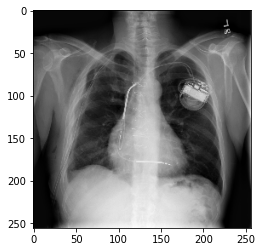

In [23]:
plt.imshow(dataImg[1],cmap="gray")

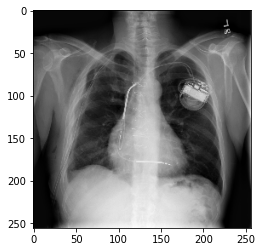

In [ ]:
imgN = sampleTestList['Image Index'][1]
imgC = cv2.imread(baseDir+'CXR8/images/images_resize/'+imgN,-1)
plt.imshow(imgC, cmap="gray")

In [ ]:
imgC.shape

(256, 256)

In [ ]:
xtest = xtest.reshape((1, ) + xtest.shape)
xtest.shape

(1, 256, 256, 3)

In [ ]:
X_train_cnn = dataImg.reshape(dataImg.shape[0], 256, 256, 1)

In [ ]:
X_train_cnn.shape

(4999, 256, 256, 1)